# All Request type by Council District

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hub_nash=pd.read_csv('../data/hubNashville__311__Service_Requests.csv')

C:\Users\arikh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
hub_nash.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,04/28/2020 02:33:22 PM,04/28/2020 02:33:22 PM,hubNashville Community,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,354524,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 09:46:53 PM,04/28/2020 09:46:53 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,354188,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 05:09:02 PM,04/28/2020 05:09:02 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,354445,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 08:50:36 PM,04/28/2020 08:50:36 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,334893,Closed,Public Safety,Control Number Request for Towing,NaN,03/29/2020 01:08:55 AM,03/29/2020 01:08:55 AM,hubNashville Community,NaN,NaN,...,False,NaN,True,Long Hollow Pike & Northcreek Blvd,GOODLETTSVILLE,10.0,37072,36.32619,-86.700618,"(36.32619, -86.70061799999999)"


In [4]:
hub_nash['Council District'].value_counts()

19.0    18781
21.0    15931
6.0     14541
17.0    13453
5.0     12846
24.0    11674
7.0     11331
20.0    11322
15.0    11011
2.0     10750
25.0    10295
16.0     9881
8.0      9558
33.0     8405
23.0     7858
29.0     7856
18.0     7808
1.0      7106
26.0     6721
28.0     6257
34.0     6066
30.0     5888
9.0      5845
3.0      5766
32.0     5508
27.0     5305
13.0     5154
31.0     4896
4.0      4598
14.0     4180
11.0     3745
12.0     2863
22.0     2628
35.0     2537
10.0     2210
Name: Council District, dtype: int64

In [34]:
hub_nash_after=hub_nash.drop(columns= ['State Issue',
                                 'Preferred Language',
                                 'Mapped Location' ])

In [35]:
hub_nash_after.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,04/28/2020 02:33:22 PM,04/28/2020 02:33:22 PM,hubNashville Community,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
1,354524,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 09:46:53 PM,04/28/2020 09:46:53 PM,Phone,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
2,354188,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 05:09:02 PM,04/28/2020 05:09:02 PM,Phone,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,354445,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 08:50:36 PM,04/28/2020 08:50:36 PM,Phone,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4,334893,Closed,Public Safety,Control Number Request for Towing,NaN,03/29/2020 01:08:55 AM,03/29/2020 01:08:55 AM,hubNashville Community,NaN,NaN,NaN,True,Long Hollow Pike & Northcreek Blvd,GOODLETTSVILLE,10.0,37072,36.32619,-86.700618


In [36]:
type(hub_nash_after)

pandas.core.frame.DataFrame

In [37]:
clean_hub_nash=hub_nash_after.dropna(subset=['Council District','Request Type'])

In [38]:
#groupby the dataframe
council_hub_nash=clean_hub_nash.groupby(['Council District',
                                        'ZIP'
                                        ]).ZIP.agg('count').to_frame('count')

In [39]:
council_hub_nash

count
Council District ZIP           
1.0              37015.0    167
                 37072.0     56
                 37080.0    708
                 37189.0    228
                 37218.0   4157
...                         ...
35.0             37221.0   1518
                 37064        8
                 37143       30
                 37209      119
                 37221      436

[307 rows x 1 columns]

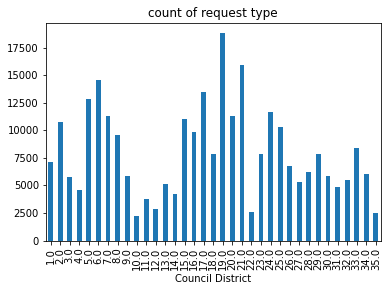

In [40]:
#another way to groupby the dataframe
council_hub_nash = clean_hub_nash.groupby(['Council District'])['Request Type'].count()

council_hub_nash.plot.bar()
plt.xticks(rotation = 90)
plt.title('count of request type');

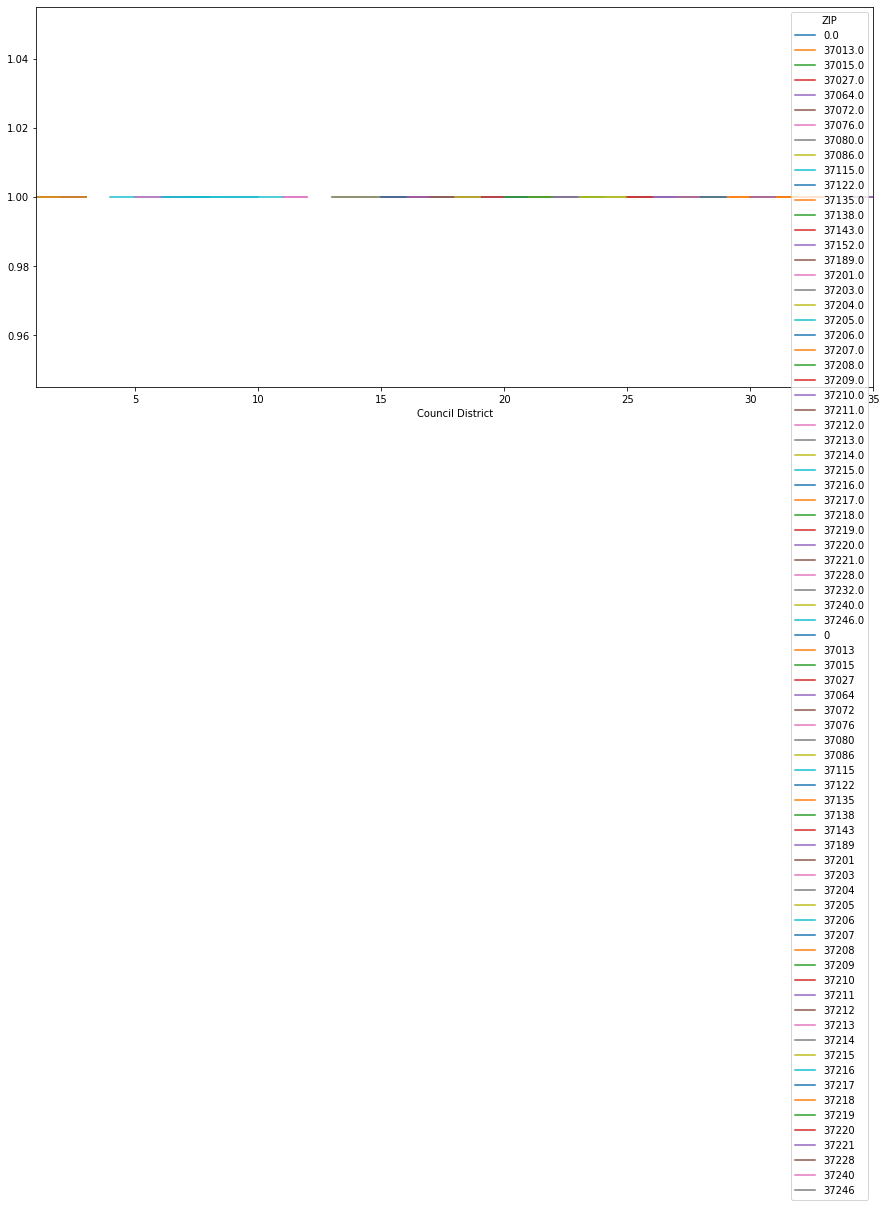

In [25]:
 #plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
council_hub_nash.groupby(['Council District','ZIP']).count()['count'].unstack().plot(ax=ax)

In [42]:
print(type(clean_hub_nash.groupby('Request Type').count()))
clean_hub_nash.groupby('Request Type').count().head()

<class 'pandas.core.frame.DataFrame'>


,Request #,Status,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude
Request Type,,,,,,,,,,,,,,,,,
COVID-19,2689,2689,2686,2456,2689,2514,2689,0,18,1,2689,2678,2683,2689,2682,2689,2689
Education & Libraries,13,13,13,0,13,4,13,0,3,0,13,13,13,13,13,13,13
Electric & Water General,4007,4007,4002,0,4007,3132,4007,44,477,5,4007,3964,3990,4007,3989,3976,3976
Hands On Volunteers,1575,1575,1575,1575,1575,1575,1575,0,2,0,1575,1575,1575,1575,1575,1575,1575
Other,1922,1922,1912,17,1922,1787,1922,484,44,25,1922,1918,1918,1922,1917,1921,1921


In [61]:
clean_hub_nash.groupby('Request Type').count().reset_index().head()

,Request Type,Request #,Status,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude
0,COVID-19,2689,2689,2686,2456,2689,2514,2689,0,18,1,2689,2678,2683,2689,2682,2689,2689
1,Education & Libraries,13,13,13,0,13,4,13,0,3,0,13,13,13,13,13,13,13
2,Electric & Water General,4007,4007,4002,0,4007,3132,4007,44,477,5,4007,3964,3990,4007,3989,3976,3976
3,Hands On Volunteers,1575,1575,1575,1575,1575,1575,1575,0,2,0,1575,1575,1575,1575,1575,1575,1575
4,Other,1922,1922,1912,17,1922,1787,1922,484,44,25,1922,1918,1918,1922,1917,1921,1921


In [64]:
#Filter only COVID-19 in request type columns
clean_hub_nash= clean_hub_nash.loc[(clean_hub_nash['Request Type'] == "COVID-19")]

In [66]:
clean_hub_nash.groupby(['Council District', 'Request Type'] )['Request Type'].count()

Council District  Request Type
1.0               COVID-19         31
2.0               COVID-19        102
3.0               COVID-19         44
4.0               COVID-19         23
5.0               COVID-19         96
6.0               COVID-19         51
7.0               COVID-19         52
8.0               COVID-19         82
9.0               COVID-19        100
10.0              COVID-19        130
11.0              COVID-19         98
12.0              COVID-19         13
13.0              COVID-19         76
14.0              COVID-19         63
15.0              COVID-19         99
16.0              COVID-19        101
17.0              COVID-19        172
18.0              COVID-19         50
19.0              COVID-19        370
20.0              COVID-19         94
21.0              COVID-19        101
22.0              COVID-19         73
23.0              COVID-19         27
24.0              COVID-19        110
25.0              COVID-19         70
26.0              C

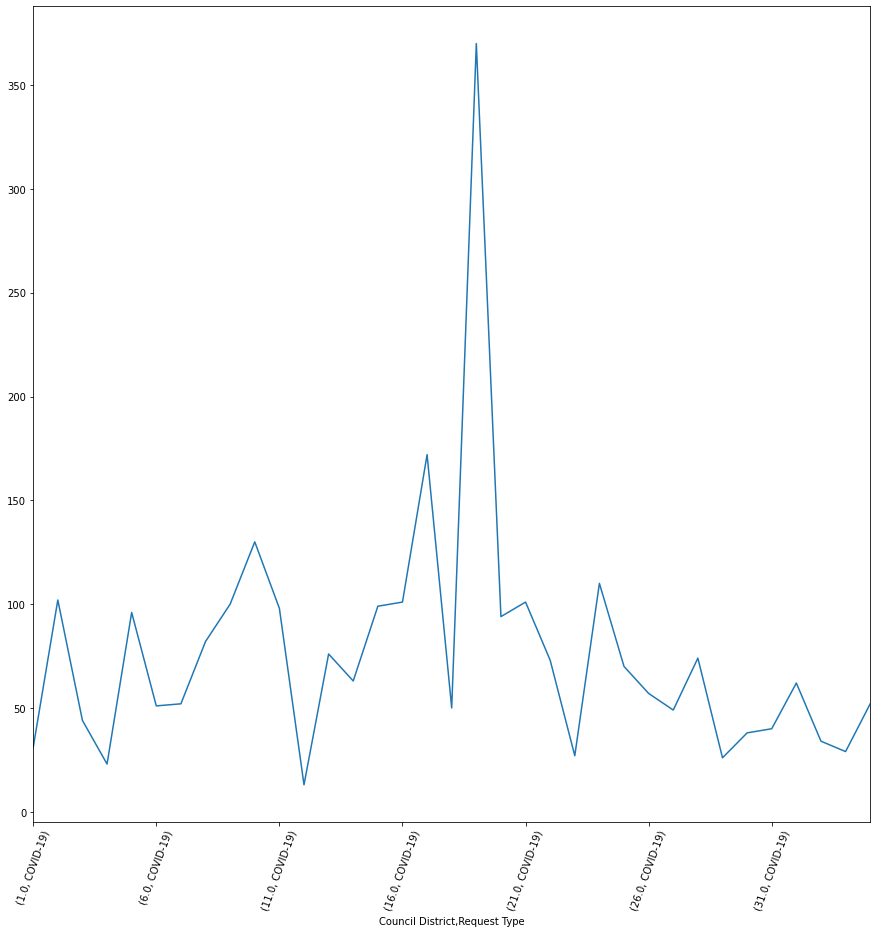

In [67]:
clean_hub_nash.groupby(['Council District', 'Request Type'] )['Request Type'].count().plot.line(figsize=(15, 15))
plt.xticks(rotation = 70);